In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [6]:
CLIENT_ID = '0G0KFCU55P01WMUAE5ZSE1NRPQQIP5F0J5EY1ZI0IKHQDNYG' 
CLIENT_SECRET = 'QU5PJIGT233ERHLCAVAPFPLYPGJ1KDN1YJYTFJHRBADVWJWM'
VERSION = '20180605'

In [7]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [8]:
nydata=get_new_york_data()

In [9]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
thai_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in nydata.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    thai_restaurants=venues[venues['Category']=='Thai Restaurant']   
    print('(',count,'/',len(nydata),')','Thai Restaurants in '+Neighborhood+', '+Borough+':'+str(len(thai_restaurants)))
    print(row)
    for resturant_detail in thai_restaurants.values.tolist():
        id, name , category=resturant_detail
        thai_rest_ny = thai_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Thai Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Thai Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Thai Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Thai Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Thai Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Thai Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Thai Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Thai Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Thai Restaurants in Norwood, Bronx:0
['Bronx', 'Norwood', 40.87722

In [10]:
thai_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Spuyten Duyvil,4a739e29f964a520f5dc1fe3,Siam Square
1,Bronx,Pelham Bay,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion
2,Brooklyn,Bay Ridge,50e8d45ae4b06202fbe39b08,Top Thai
3,Brooklyn,Greenpoint,5f0a40327420543cf291363d,Little Tiffin
4,Brooklyn,Kensington,4b36a0f5f964a5207b3925e3,To Be Thai


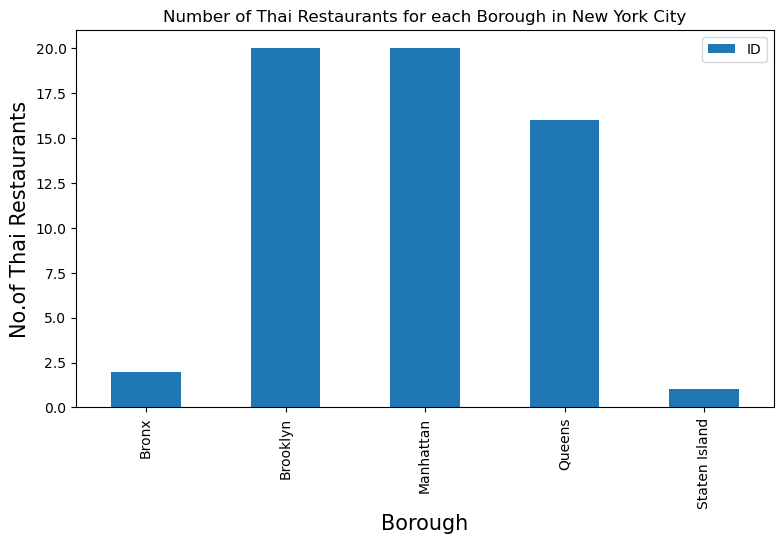

In [12]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Thai Restaurants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Thai Restaurants', fontsize=15)
#giving a bar plot
thai_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

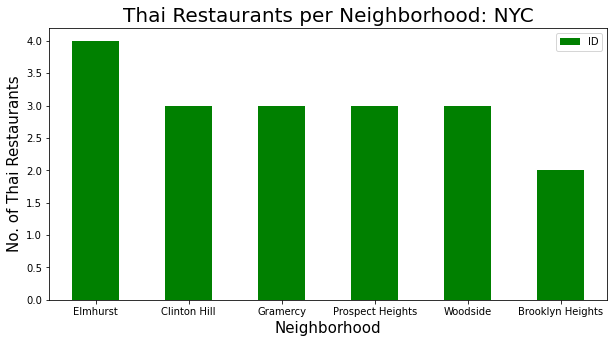

In [44]:
NOofNeigh = 6 # top number for graphing all the same past 6
thai_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color='green')
plt.title('Thai Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Thai Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [16]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
thai_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in thai_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(thai_rest_ny),')','processed')
    thai_rest_stats_ny = thai_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
thai_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '60968e2deb32b7484eb16bf7'}, 'response': {'venue': {'id': '4a739e29f964a520f5dc1fe3', 'name': 'Siam Square', 'contact': {'phone': '7184328200', 'formattedPhone': '(718) 432-8200'}, 'location': {'address': '564 Kappock St', 'lat': 40.8787962348852, 'lng': -73.91670090763066, 'labeledLatLngs': [{'label': 'display', 'lat': 40.8787962348852, 'lng': -73.91670090763066}, {'label': 'entrance', 'lat': 40.878772, 'lng': -73.916958}], 'postalCode': '10463', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['564 Kappock St', 'Bronx, NY 10463', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/siam-square/4a739e29f964a520f5dc1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount':

KeyError: 'venue'

In [17]:
thai_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Spuyten Duyvil,4a739e29f964a520f5dc1fe3,Siam Square,15,7.0,13
1,Bronx,Pelham Bay,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion,19,7.7,27
2,Brooklyn,Bay Ridge,50e8d45ae4b06202fbe39b08,Top Thai,14,7.4,11
3,Brooklyn,Greenpoint,5f0a40327420543cf291363d,Little Tiffin,6,8.2,2
4,Brooklyn,Kensington,4b36a0f5f964a5207b3925e3,To Be Thai,17,7.8,16


In [18]:
thai_rest_stats_ny.shape

(50, 7)

In [19]:
thai_rest_stats_ny.to_csv

<bound method NDFrame.to_csv of       Borough        Neighborhood                        ID  \
0       Bronx      Spuyten Duyvil  4a739e29f964a520f5dc1fe3   
1       Bronx          Pelham Bay  4b4c90d3f964a52046b626e3   
2    Brooklyn           Bay Ridge  50e8d45ae4b06202fbe39b08   
3    Brooklyn          Greenpoint  5f0a40327420543cf291363d   
4    Brooklyn          Kensington  4b36a0f5f964a5207b3925e3   
5    Brooklyn          Kensington  54daa265498e58e310cae373   
6    Brooklyn    Prospect Heights  57117904498eea6297e41d0a   
7    Brooklyn    Prospect Heights  56773ac0498e301585915c6f   
8    Brooklyn    Prospect Heights  58fe480bda708012683cda5f   
9    Brooklyn    Brooklyn Heights  476f8da1f964a520044d1fe3   
10   Brooklyn    Brooklyn Heights  568f0a26498e56870db2c2ce   
11   Brooklyn         Cobble Hill  5c3684e55bc27d0025177564   
12   Brooklyn     Carroll Gardens  59985da3da5e5606a926b53d   
13   Brooklyn     Carroll Gardens  5a959bf0646e38268740806b   
14   Brooklyn          

In [20]:
thai_rest_stats_ny['Likes'] = thai_rest_stats_ny['Likes'].astype('float64')
thai_rest_stats_ny['Tips'] = thai_rest_stats_ny['Tips'].astype('float64')
thai_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     float64
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [21]:
thai_rest_stats_ny.describe()

,Likes,Rating,Tips
count,50.000000,50.000000,50.000000
mean,84.000000,7.880000,31.620000
std,147.032275,1.377368,58.028455
min,0.000000,0.000000,0.000000
25%,15.000000,7.400000,6.000000
50%,31.500000,8.100000,13.000000
75%,73.750000,8.650000,29.750000
max,766.000000,9.500000,359.000000


In [23]:

thai_rest_stats_ny.iloc[thai_rest_stats_ny['Likes'].idxmax()]

Borough                           Queens
Neighborhood                    Woodside
ID              3fd66200f964a5204ef11ee3
Name                          SriPraPhai
Likes                                766
Rating                                 9
Tips                                 359
Name: 38, dtype: object

In [25]:
thai_rest_stats_ny.iloc[thai_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                   Chinatown
ID              5cc4e9d0c876c8002c3010cb
Name                               Wayla
Likes                                151
Rating                               9.5
Tips                                  30
Name: 22, dtype: object

In [27]:

thai_rest_stats_ny.iloc[thai_rest_stats_ny['Tips'].idxmax()]

Borough                           Queens
Neighborhood                    Woodside
ID              3fd66200f964a5204ef11ee3
Name                          SriPraPhai
Likes                                766
Rating                                 9
Tips                                 359
Name: 38, dtype: object

In [52]:
ny_neighborhood_stats=thai_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
5,Chinatown,9.500000
17,Lenox Hill,9.050000
30,Yorkville,9.000000
8,Downtown,9.000000
18,Little Italy,8.950000
3,Carroll Gardens,8.700000
24,South Side,8.500000
11,Elmhurst,8.475000
21,Prospect Heights,8.466667
6,Clinton Hill,8.300000


,Borough,Average Rating
2,Manhattan,8.237500
1,Brooklyn,8.020000
0,Bronx,7.350000
3,Queens,7.258333


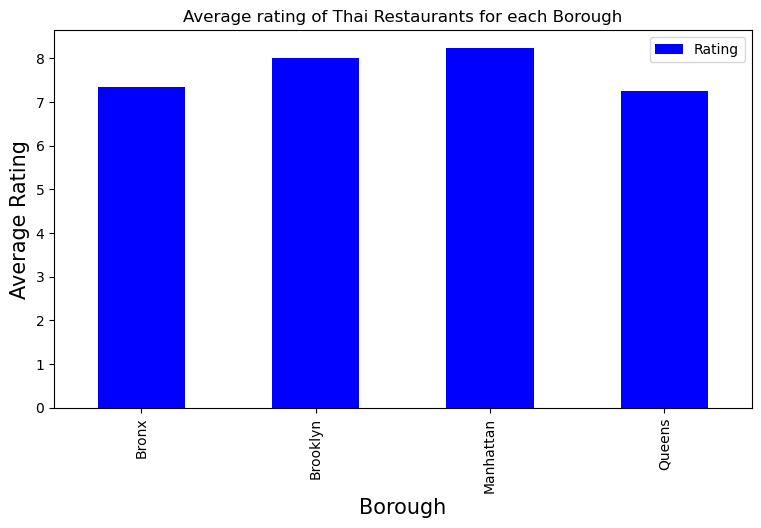

In [32]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Thai Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
thai_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color='blue')
plt.legend()
plt.show()

In [33]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.5]
ny_neighborhood_stats

,Neighborhood,Average Rating
3,Carroll Gardens,8.700000
4,Chelsea,8.050000
5,Chinatown,9.500000
6,Clinton Hill,8.300000
8,Downtown,9.000000
9,East Harlem,8.250000
11,Elmhurst,8.475000
14,Greenpoint,8.200000
15,Jackson Heights,8.200000
16,Kensington,8.150000


In [35]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,nydata, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Carroll Gardens,40.680540,-73.994654,8.700000
1,Manhattan,Chelsea,40.744035,-74.003116,8.050000
2,Staten Island,Chelsea,40.594726,-74.189560,8.050000
3,Manhattan,Chinatown,40.715618,-73.994279,9.500000
4,Brooklyn,Clinton Hill,40.693229,-73.967843,8.300000
5,Brooklyn,Downtown,40.690844,-73.983463,9.000000
6,Manhattan,East Harlem,40.792249,-73.944182,8.250000
7,Queens,Elmhurst,40.744049,-73.881656,8.475000
8,Brooklyn,Greenpoint,40.730201,-73.954241,8.200000
9,Queens,Jackson Heights,40.751981,-73.882821,8.200000


In [36]:

# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [37]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

In [38]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [40]:
incidents = folium.map.FeatureGroup()


In [42]:
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [43]:

# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)